In [1]:
import mdptoolbox

In [2]:
import mdptoolbox.example

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sunburst(nodes, total=np.pi * 2, offset=0, level=0, ax=None):
    ax = ax or plt.subplot(111, projection='polar')

    if level == 0 and len(nodes) == 1:
        label, value, subnodes = nodes[0]
        ax.bar([0], [0.5], [np.pi * 2])
        ax.text(0, 0, label, ha='center', va='center')
        sunburst(subnodes, total=value, level=level + 1, ax=ax)
    elif nodes:
        d = np.pi * 2 / total
        labels = []
        widths = []
        local_offset = offset
        for label, value, subnodes in nodes:
            labels.append('{}({}%)'.format(label,value))
            widths.append(value * d)
            sunburst(subnodes, total=total, offset=local_offset,
                     level=level + 1, ax=ax)
            local_offset += value
        values = np.cumsum([offset * d] + widths[:-1])
        heights = [1] * len(nodes)
        bottoms = np.zeros(len(nodes)) + level - 0.5
        rects = ax.bar(values, heights, widths, bottoms, linewidth=1,
                       edgecolor='white', align='edge')
        for rect, label in zip(rects, labels):
            x = rect.get_x() + rect.get_width() / 2
            y = rect.get_y() + rect.get_height() / 2
            rotation = (90 + (360 - np.degrees(x) % 180)) % 360
            ax.text(x, y, label, rotation=rotation, ha='center', va='center') 

    if level == 0:
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        ax.set_axis_off()

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['font.size']=25 #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用于正常显示负号

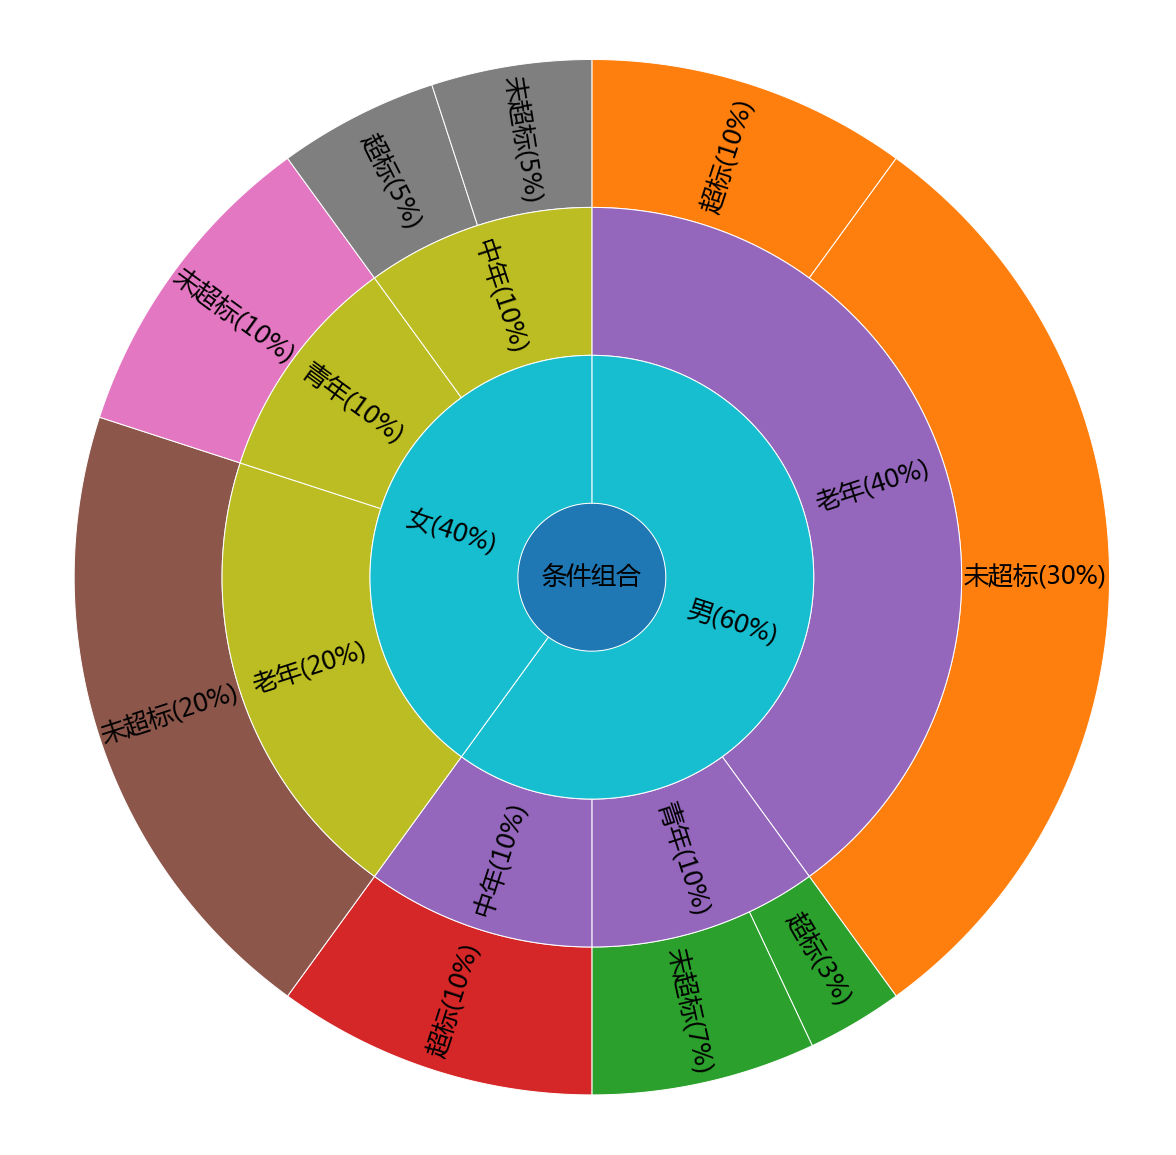

In [5]:
data = [
    ('条件组合', 100, [
        ('男', 60, [
            ('老年', 40, [
                ('超标', 10, []),
                ('未超标', 30, []),                
            ]),
            ('青年', 10, [
                ('超标', 3, []),
                ('未超标', 7, []),                
            ]
            ),
            ('中年', 10, 
            [
                ('超标', 10, []),
            ]             
            ),
        ]
        ),
        ('女', 40, [
            ('老年', 20, [
                ('未超标', 20, []),                
            ]),
            ('青年', 10, [
                ('未超标', 10, []),                
            ]
            ),
            ('中年', 10, 
            [
                ('超标', 5, []),
                ('未超标', 5, []),                
            ]             
            ),
        ]
        ),
    ]
)
]

f = plt.figure(figsize=(20, 20))
sunburst(data)